# 🛒 E-commerce Sales Analytics Dashboard

📅 **Goal:** Analyze sales and profitability trends to inform marketing strategy.  
👩‍💻 **Tools:** Python (Pandas, SQL, Seaborn, Plotly)  

---

## 🔍 Project Overview
This project explores transaction data to identify top-performing categories, customer segments, and regional profit gaps.

### ✅ Objectives
- Calculate KPIs (Sales, Profit, Margin)
- Perform EDA by region, category, and month
- Visualize insights interactively using Streamlit
- In short: Analyze how the store is performing and find ways to improve profitability and efficiency
“The goal of this project is to analyze sales, profit, and operational data from the Superstore dataset to understand key performance drivers across regions, categories, and time.
Through data visualization and KPI analysis, we aim to identify areas of strong performance and potential improvement to help the store increase profitability.”
---

### 🧮 Dataset Info
The dataset contains orders from an online store, including columns like `Sales`, `Profit`, `Category`, and `Region`.



<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />
<br/><br/>

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import duckdb

## Load Dataset

In [5]:
df = pd.read_csv("../data/superstore.csv", encoding="latin-1")
df.head(11)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


## Data Cleaning

In [4]:
print(df.info(), "\n\nMissing values per column:\n", df.isna().sum())

df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"]  = pd.to_datetime(df["Ship Date"])
df["Profit Margin"] = df["Profit"] / df["Sales"]
df["Order Month"] = df["Order Date"].dt.to_period("M").astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Basic Summary Statistics

In [5]:
display(df.describe(include="all"))
print("\nUnique values per column:\n", df.nunique())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Month
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN,48
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN,2017-12
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN,462
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,0.120314,NaN
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-2.750000,NaN
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,0.075000,NaN
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,0.270000,NaN
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,0.362500,NaN
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000,0.500000,NaN



Unique values per column:
 Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
Profit Margin     572
Order Month        48
dtype: int64


## Initial KPIs

In [6]:
total_sales  = df["Sales"].sum()
total_profit = df["Profit"].sum()
profit_margin = total_profit / total_sales

print(f"💰 Total Sales: ${total_sales:,.0f}")
print(f"📈 Total Profit: ${total_profit:,.0f}")
print(f"🏦 Overall Profit Margin: {profit_margin:.2%}")

💰 Total Sales: $2,297,201
📈 Total Profit: $286,397
🏦 Overall Profit Margin: 12.47%


<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />

## Exploratory Data Analysis 📊

This is the Exploratory Data Analaysis part where we will explores sales and profit performance across different dimensions (regions and product categories) to identify areas driving overall profitability and regions that may need operational improvement.

## Part 1 : Regional Analysis

### 1. Total Sales By Region

We start by comparing total sales and profit across regions to identify which parts of the business contribute most to revenue and profitability.

In [7]:
region_summary = (
    df.groupby("Region")[["Sales", "Profit"]]
      .sum()
      .sort_values("Sales", ascending=False)
)
region_summary["Profit Margin"] = region_summary["Profit"] / region_summary["Sales"]
display(region_summary)

,Sales,Profit,Profit Margin
Region,,,
West,725457.8245,108418.4489,0.149448
East,678781.2400,91522.7800,0.134834
Central,501239.8908,39706.3625,0.079216
South,391721.9050,46749.4303,0.119343


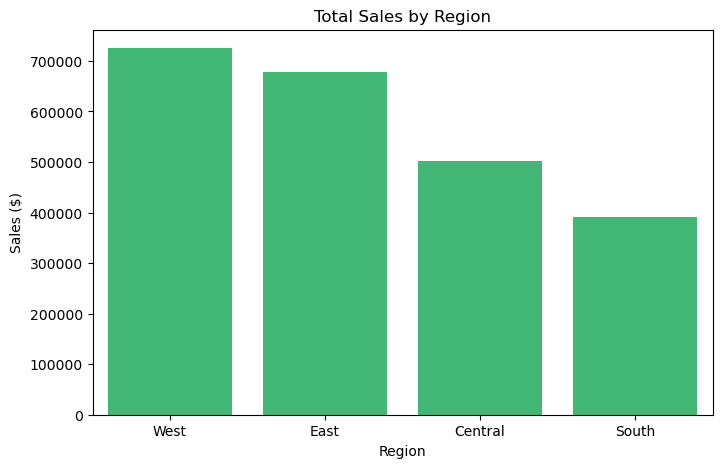

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=region_summary.index,
    y=region_summary["Sales"],
    hue=None,
    color="#2ecc71"
)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales ($)")
plt.show()

Insights: 
- The West region generates the **highest** sales and profit overall.
- The Central region shows lower profitability despite moderate sales, suggesting possible cost or discount issues.
- The South has the **lowest** total sales but maintains a decent profit margin compared to Central.

---
### 2. Sales vs Profit by Region
We compare each region’s total sales and profit to understand how well revenue translates into earnings.

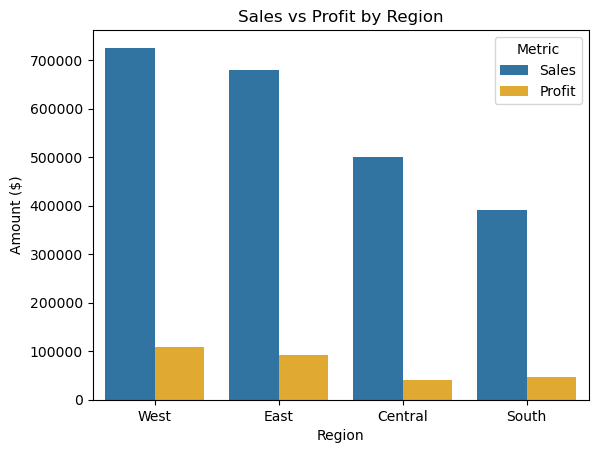

In [9]:
region_summary_plot = region_summary.reset_index().melt(
    id_vars="Region",
    value_vars=["Sales", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

sns.barplot(
    data=region_summary_plot,
    x="Region",
    y="Amount",
    hue="Metric",
    palette={"Sales": "#1f77b4", "Profit": "#fdb515"}
)
plt.title("Sales vs Profit by Region")
plt.ylabel("Amount ($)")
plt.show()

Insights: 

There’s a clear positive trend in the **West** and **East** regions as higher sales correspond with higher profit. However, this pattern **does not hold for the Central region**. Despite having higher sales than the South, it earns less profit. This suggests potential inefficiencies in the Central region’s operations, pricing, or discount strategy. 

Note: We will revisit this later in the analysis to investigate potential causes such as product mix, discounts, or customer segment differences.

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 1px solid #003262;" />
<br/><br/>

## Part 2 : Category Analysis

### 1. Total Sales & Profit by Category
We compare total sales and profit across product categories to identify top-performing segments and uncover areas where strong sales may not translate into healthy profit margins.


In [10]:
category_summary = (
    df.groupby("Category")[["Sales", "Profit"]]
    .sum()
    .sort_values("Sales", ascending=False)
)

category_summary["Profit Margin"] = category_summary["Profit"] / category_summary["Sales"]

display(category_summary)

,Sales,Profit,Profit Margin
Category,,,
Technology,836154.0330,145454.9481,0.173957
Furniture,741999.7953,18451.2728,0.024867
Office Supplies,719047.0320,122490.8008,0.170352


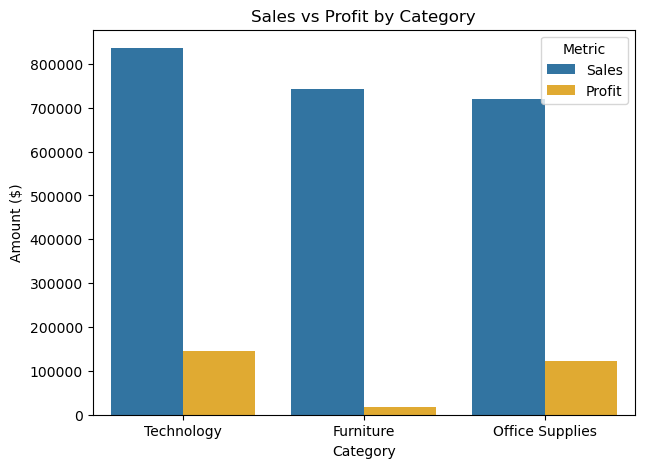

In [11]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=category_summary.reset_index().melt(
        id_vars="Category",
        value_vars=["Sales", "Profit"],
        var_name="Metric",
        value_name="Amount"
    ),
    x="Category",
    y="Amount",
    hue="Metric",
    palette={"Sales": "#1f77b4", "Profit": "#fdb515"}
)
plt.title("Sales vs Profit by Category")
plt.ylabel("Amount ($)")
plt.xlabel("Category")
plt.show()

Insights:

- **Technology** leads both in total sales and profit, making it the store’s most profitable category overall.
- **Office Supplies** also performs well with solid sales and a strong profit margin (~17%), showing consistent profitability.
- **Furniture**, however, stands out with *very low profitability* (≈2.5%) despite having high sales volume — suggesting possible issues like high shipping costs, heavy discounts, or lower pricing efficiency.
---

### 2. Sub-Category Analysis
We now break down each main product category into its **sub-categories** to identify which specific products drive sales and profit, and which ones underperform or have low profit margins. 
This helps us uncover potential areas where pricing, discounts, or product strategy might need adjustment.

In [11]:
subcat_summary = (
    df.groupby(["Category", "Sub-Category"])[["Sales", "Profit"]]
    .sum()
    .sort_values("Sales", ascending=False)
)

subcat_summary["Profit Margin"] = subcat_summary["Profit"] / subcat_summary["Sales"]
display(subcat_summary.head(10))

Sales      Profit  Profit Margin
Category        Sub-Category                                        
Technology      Phones        330007.0540  44515.7306       0.134893
Furniture       Chairs        328449.1030  26590.1663       0.080957
Office Supplies Storage       223843.6080  21278.8264       0.095061
Furniture       Tables        206965.5320 -17725.4811      -0.085645
Office Supplies Binders       203412.7330  30221.7633       0.148574
Technology      Machines      189238.6310   3384.7569       0.017886
                Accessories   167380.3180  41936.6357       0.250547
                Copiers       149528.0300  55617.8249       0.371956
Furniture       Bookcases     114879.9963  -3472.5560      -0.030228
Office Supplies Appliances    107532.1610  18138.0054       0.168675

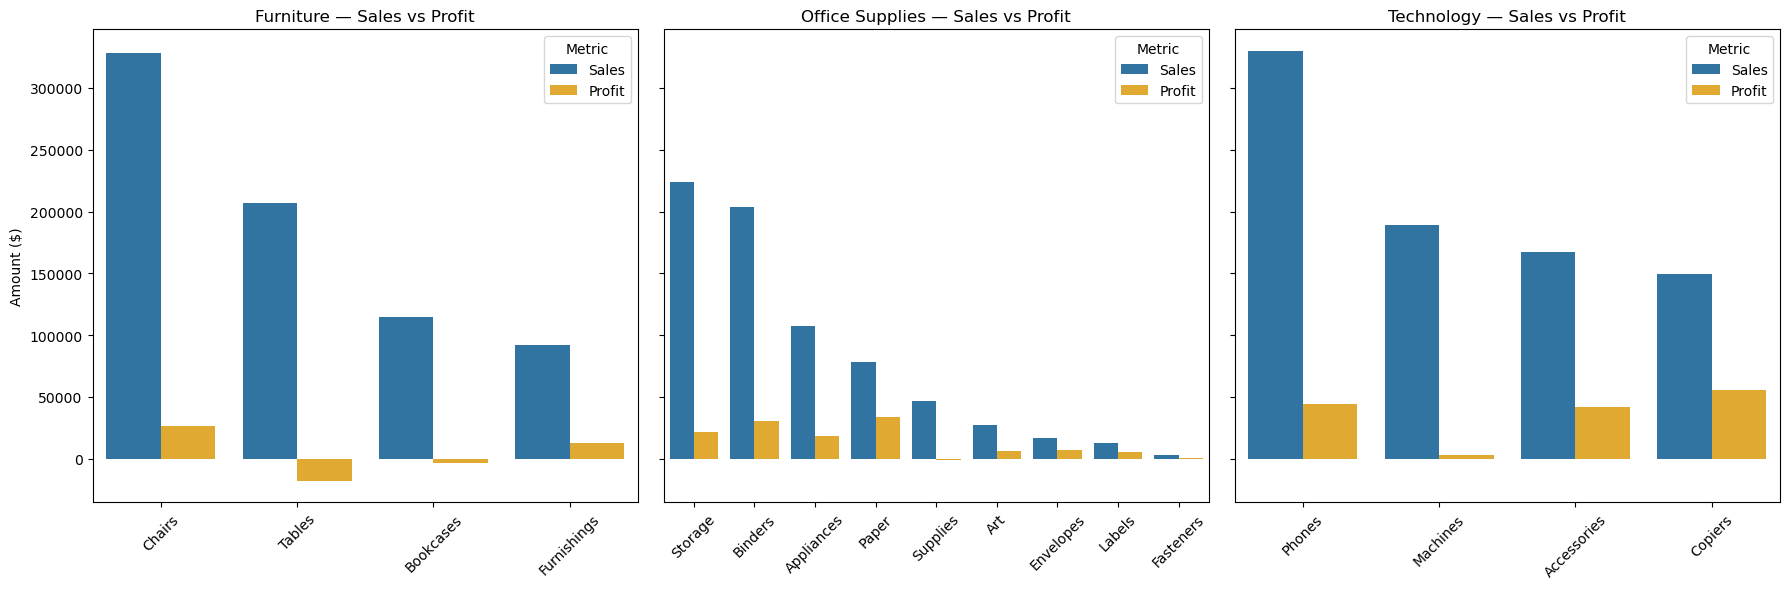

In [12]:
categories = df["Category"].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, cat in enumerate(categories):
    data = subcat_summary.loc[cat].reset_index()
    sns.barplot(
        data=data.melt(id_vars="Sub-Category", value_vars=["Sales", "Profit"],
                       var_name="Metric", value_name="Amount"),
        x="Sub-Category", y="Amount", hue="Metric", palette={"Sales": "#1f77b4", "Profit": "#fdb515"}, ax=axes[i]
    )
    axes[i].set_title(f"{cat} — Sales vs Profit")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Amount ($)" if i == 0 else "")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(title="Metric")

plt.tight_layout()
plt.show()

Insights:
- **Technology:** Phones and Copiers generate the highest sales and profit. Machines, while high in sales, have much lower profitability, almost none at all. 
- **Furniture:** Chairs and Tables drive large sales but very low or negative profits. This explains the category’s poor margin overall.  
- **Office Supplies:** Binders and Appliances perform steadily with strong margins, indicating reliable profitability.

These results prove and confirm that the **Furniture category’s low overall margin** stems mainly from unprofitable sub-categories like Chairs, Tables, and Bookcases.  


<hr style="border: 1px solid #fdb515;" />
<hr style="border: 1px solid #003262;" />
<br/><br/>

## Part 3 : Customer Segment Analysis

We are now going to get the Total Sales, Profit, and Profit Margin by each customer segment

In [13]:
segment_summary = (
    df.groupby("Segment")[["Sales", "Profit"]]
    .sum()
    .sort_values("Sales", ascending=False)
)

segment_summary["Profit Margin"] = segment_summary["Profit"] / segment_summary["Sales"]
display(segment_summary)

,Sales,Profit,Profit Margin
Segment,,,
Consumer,1.161401e+06,134119.2092,0.115481
Corporate,7.061464e+05,91979.1340,0.130255
Home Office,4.296531e+05,60298.6785,0.140343


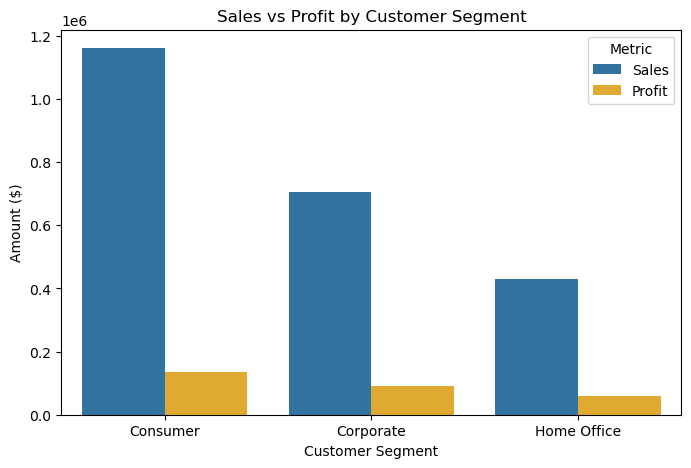

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=segment_summary.reset_index().melt(
        id_vars="Segment",
        value_vars=["Sales", "Profit"],
        var_name="Metric",
        value_name="Amount"
    ),
    x="Segment",
    y="Amount",
    hue="Metric",
    palette={"Sales": "#1f77b4", "Profit": "#FDB515"} 
)
plt.title("Sales vs Profit by Customer Segment")
plt.ylabel("Amount ($)")
plt.xlabel("Customer Segment")
plt.show()

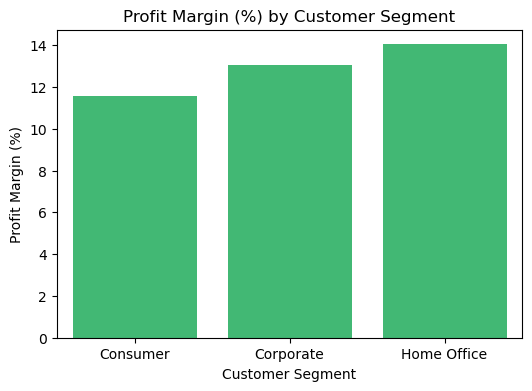

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=segment_summary.index,
    y=segment_summary["Profit Margin"] * 100, 
    color="#2ecc71"
)
plt.title("Profit Margin (%) by Customer Segment")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Customer Segment")
plt.show()

Insights:
- The **Consumer** segment drives the highest sales and total profit, but they have the lowest profit margin which suggests that consumer customers usually buy in bulk and large volumes. They are also more price-sensitive and are more likely to respond to discounts and promotions deals.
- **Corporate** customers, while smaller in volume, have strong profit margins. This suggests they may be less price-sensitive as customers may value reliability and service quality over price, therefore there is stable profitability.  
- **Home Office** contributes the least in total sales and profit, however they have the highest profit margin which suggests that they have a smaller but highly efficient and potentially loyal customer base.

These results suggest that focusing on **Consumer** customers can maintain volume, while strategic pricing or premium offerings for **Corporate** clients could further boost profitability.
<hr style="border: 1px solid #fdb515;" />
<hr style="border: 1px solid #003262;" />
<br/><br/>

## Part 4 : Time-Trend Analysis (Sales & Profit Over Time)
We will now analyze how Sales and Profit evolve over time to uncover seasonal trends, growth patterns, and potential business cycles.

In [17]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)

In [18]:
monthly_summary = (
    df.groupby("YearMonth")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

display(monthly_summary.head(10))

,YearMonth,Sales,Profit
0,2014-01,14236.8950,2450.1907
1,2014-02,4519.8920,862.3084
2,2014-03,55691.0090,498.7299
3,2014-04,28295.3450,3488.8352
4,2014-05,23648.2870,2738.7096
5,2014-06,34595.1276,4976.5244
6,2014-07,33946.3930,-841.4826
7,2014-08,27909.4685,5318.1050
8,2014-09,81777.3508,8328.0994
9,2014-10,31453.3930,3448.2573


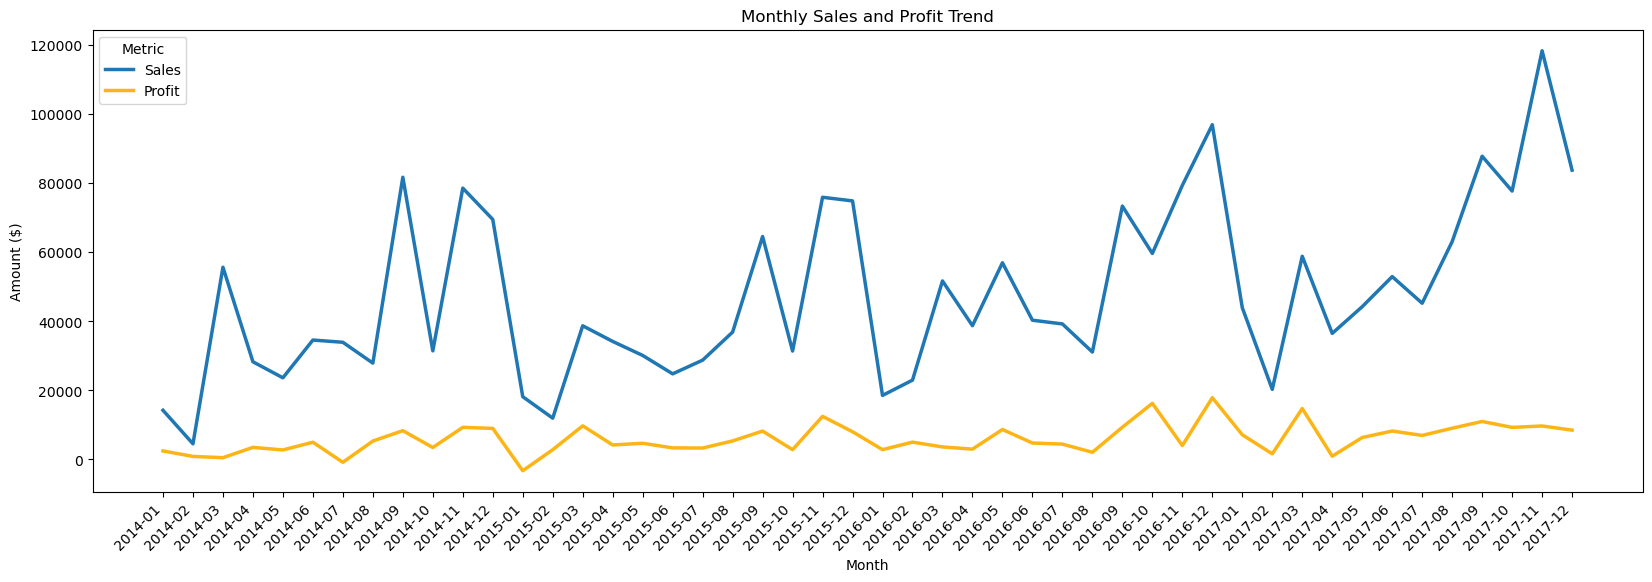

In [19]:
plt.figure(figsize=(20,6))
sns.lineplot(data=monthly_summary, x="YearMonth", y="Sales", label="Sales", color="#1f77b4", linewidth=2.5)
sns.lineplot(data=monthly_summary, x="YearMonth", y="Profit", label="Profit", color="#FDB515", linewidth=2.5)
plt.title("Monthly Sales and Profit Trend")
plt.ylabel("Amount ($)")
plt.xlabel("Month")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.show()

Insights:
- Sales and profit generally trend upward over time, with noticeable peaks around **November and December**, likely due to holiday or end-of-year purchases.
- Mid-year months (like **June–August**) show smaller dips, suggesting slower sales cycles.
- Profit closely follows sales trends, indicating consistent cost structures.

Interpretation: 
The business shows **seasonal behavior**, with strong Q4 performance. Marketing or inventory strategies could leverage these high-demand months for targeted promotions.

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 1px solid #003262;" />
<br/><br/>

## Part 5 — Discount Impact on Profitability
We are now going to determine whether giving larger discounts improves sales or simply hurts profit. This analysis will help explain the low margins we saw (especially in Furniture & Central region).

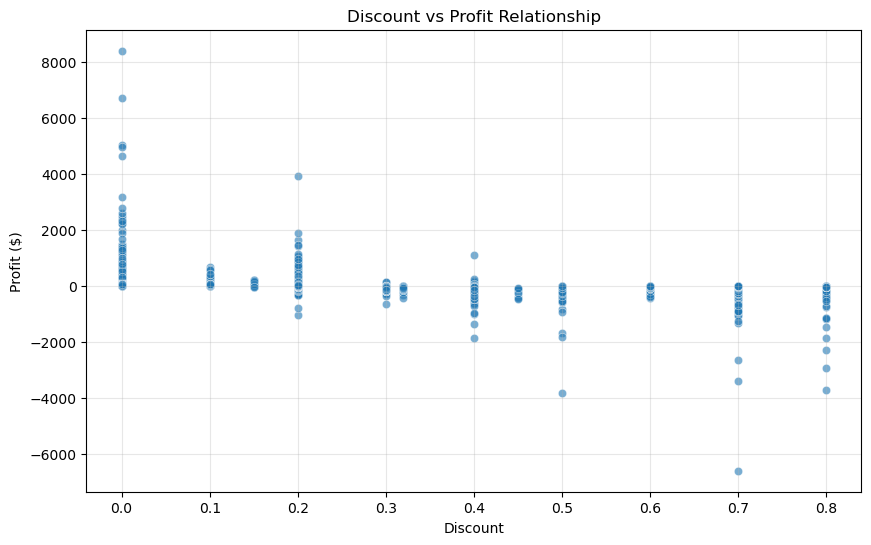

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.6, color="#1f77b4")
plt.title("Discount vs Profit Relationship")
plt.xlabel("Discount")
plt.ylabel("Profit ($)")
plt.grid(alpha=0.3)
plt.show()

This shows how profit changes as discounts increase. This means we will expect to see more negative profits at higher discounts.

In [23]:
corr = df["Discount"].corr(df["Profit"])
print(f"Correlation between Discount and Profit: {corr:.2f}")

Correlation between Discount and Profit: -0.22


We get a negative correlation of -0.22, which is around (e.g., −0.4 to −0.6) meaning higher discounts -> lower profits.

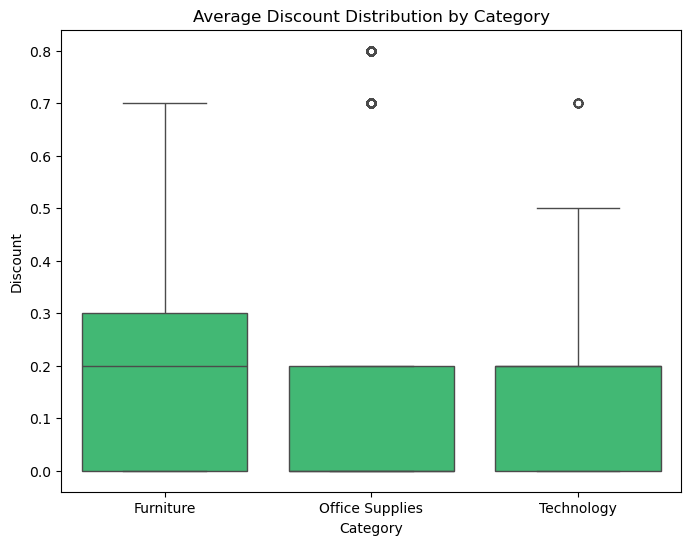

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Category", y="Discount", color="#2ecc71")
plt.title("Average Discount Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Discount")
plt.show()

Insights:
- Discounts show a clear **negative relationship with profit**, especially beyond 30–40%.
- High-discount orders in the **Furniture** category often result in losses.
- Moderate discounts (below 20%) still maintain positive profit margins.
- This indicates discounting can boost sales short-term but erodes long-term profitability.

Recommendation:**  
The store should consider limiting deep discounts, especially on low-margin categories, and instead promote value-based pricing or bundled offers to maintain healthy profits.

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />


## Final Summary and Recommendations  

After performing an Exploratory Data Analysis (EDA) on the Superstore dataset, we can conclude the following key insights:  

### Regional Performance
- The **West** region leads both in sales and profitability, while the **Central** region shows higher sales but weaker profits — likely due to heavy discounting or less efficient product mix.  

### Category and Sub-Category
- **Technology** drives the highest overall sales and profit.  
- **Furniture** generates high sales volume but has low or even negative margins, largely driven by **Chairs** and **Tables**.  
- **Office Supplies** remains steady and consistently profitable.  

### Customer Segments
- **Consumers** bring the most revenue but at thinner margins.  
- **Corporate** clients provide balanced performance.  
- **Home Office** customers show the strongest margins but smallest volume — a potential growth segment.  

### Time Trends
- Sales and profits rise toward **Q4 (November–December)**, likely due to holiday demand.  
- Mid-year dips suggest a quieter sales season that could benefit from marketing pushes or special promotions.  

### Discount Impact
- Discounts show a **negative correlation** with profit.  
- High discounts (≥30%) often lead to losses, especially in **Furniture**.  
- The business should reduce over-discounting and focus on value-based pricing or targeted promotions.  

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 1px solid #003262;" />
         
### Business Recommendations
1. **Reassess Furniture pricing and discount policies** to restore healthy margins.  
2. **Leverage Technology and Corporate clients** as profit growth drivers.  
3. **Invest in Home Office marketing** to scale high-margin customers.  
4. **Plan seasonal inventory and campaigns** around Q4 peaks.  
5. **Introduce data-driven discount strategies** (limit deep discounts on low-margin items).  

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />
<br/><br/>